In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines


# Data Import and Small Cleaning

In [2]:
round1_table = pd.read_csv('AdaptyvBio Round1 Expression - Sequences and Expression.csv')
round1_table['EXPRESSION'] = round1_table['EXPRESSION'].replace('high', 'High')
round1_table

,#,USER,DESIGN NAME,EXPRESSION,EXPRESSION #,SEQUENCE,BINDING?,REPLICATES,Kd - Mean,Kon - Mean,Koff - Mean,plddt,pae_interaction,model_names,methods
0,0,NaN,Cetuximab_scFv,Low,1,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...,TRUE,2,6.64E-09,9.48E+05,4.42E-03,NaN,NaN,NaN,NaN
1,1,ahmedsameh,ahmedsameh-Q3,Medium,2,WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,TRUE,2,3.69E-08,1.08E+05,3.76E-03,77.840455,28.217942,"[""Rosetta""]","[""Physics Based""]"
2,2,ahmedsameh,ahmedsameh-yy2,Medium,2,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQRE...,TRUE,2,6.28E-08,1.09E+05,6.83E-03,77.288939,28.177070,"[""Rosetta""]","[""Physics Based""]"
3,3,martin.pacesa+lennart.nickel,martin.pacesa-EGFR_l138_s90285_mpnn2,High,3,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...,TRUE,3,4.91E-07,1.86E+04,9.08E-03,88.653551,16.878782,"[""AF2 Backprop""]","[""Hallucination""]"
4,4,x.rustamov,x.rustamov-m_18_41,High,3,SAGQAQIEEVKARADKAKTLEELKELRKEAYEKNWKAYMAVVDETE...,TRUE,2,4.77E-06,--,--,89.580600,14.921833,"[""AF2 Backprop""]","[""Hallucination""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197,ahmedsameh,ahmedsameh-y6,NaN,0,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,Unknown,3,--,--,--,74.065691,28.327152,"[""Custom (Generative)""]","[""De Novo""]"
198,198,ahmedsameh,ahmedsameh-s3,Low,1,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,FALSE,2,--,--,--,77.784242,28.178994,"[""Rosetta""]","[""Physics Based""]"
199,199,akshaychenna,akshayc-10_run_3_1002_dldesign_0_cycle1_af2pred,NaN,0,GTSESLAKLQFIKDLAAALAPLDKKREEAEKKLYEEIKKLVPEGAE...,Unknown,3,--,--,--,77.753258,28.208359,"[""Rosetta""]","[""Physics Based""]"
200,200,NaN,akshayc-9_run_3_1002_dldesign_0_cycle1_af2pred,Low,1,GISESLAMLEFLKKLAEALAPLTKIEEEAEKELKEKIKELVPEGSE...,FALSE,3,NaN,NaN,NaN,77.456894,28.246956,"[""Rosetta""]","[""Physics Based""]"


# Main Plot: PLDDT vs iPAE colored by Expression Rate. Binders Highlighted

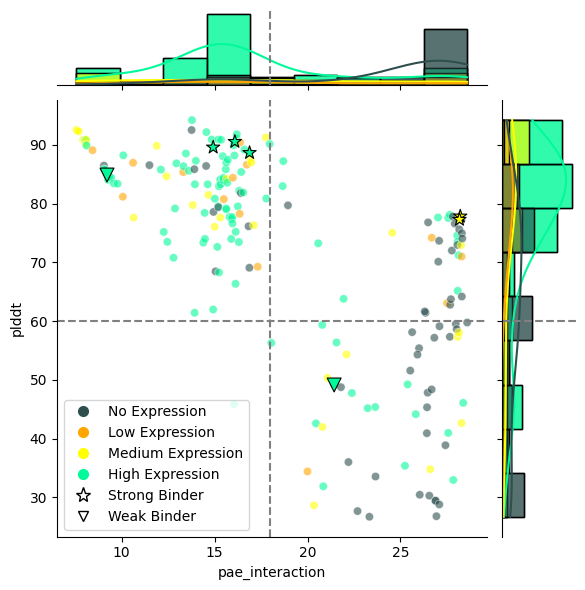

In [ ]:
custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=round1_table, x="pae_interaction", y="plddt", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=60)
true_mask = round1_table[(round1_table['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='plddt', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = round1_table[(round1_table['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='plddt', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower left')
#g.savefig("iPAE-expression.png", dpi=600)

# Ridge Plot of Expression Rates across iPAE

/Users/agoldberg/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/agoldberg/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/agoldberg/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/agoldberg/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.ti

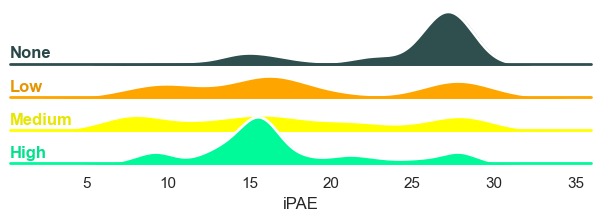

In [ ]:
from matplotlib.colors import to_rgba, rgb_to_hsv, hsv_to_rgb

custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
i = np.tile(['None Expression','Low Expression', 'Medium Expression', 'High Expression'], 50)
i = sns.FacetGrid(round1_table, row="EXPRESSION #", hue="EXPRESSION #", aspect=15, height=.5, palette=custom_palette)

i.map(sns.kdeplot, "pae_interaction",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
i.map(sns.kdeplot, "pae_interaction", clip_on=False, color="w", lw=2, bw_adjust=.5)

i.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


#desaturate label color
def desaturate_color(color, amount=0.8):
    rgba = to_rgba(color)  # Convert to RGBA
    hsv = rgb_to_hsv(rgba[:3])  # Convert RGB to HSV
    hsv[2] *= amount # Desaturate
    return hsv_to_rgb(hsv)
# Define labels mapping for 'EXPRESSION #' values
expression_labels = {0: 'None', 1: 'Low', 2: 'Medium', 3: 'High'}
def label(x, color, label):
    ax = plt.gca()
    expression_label = expression_labels[int(label)]
    de_color = desaturate_color(color, .9)
    ax.text(0, .2, expression_label, fontweight="bold", color=de_color,
            ha="left", va="center", transform=ax.transAxes)


i.map(label, "pae_interaction")

i.figure.subplots_adjust(hspace=-.4)

i.set_titles("")
i.set(yticks=[], ylabel="")
i.despine(bottom=True, left=True)

i.set_xlabels("iPAE")
# i.savefig('iPAE-expression-RIDGEPLOT.png', dpi=600)

# Percentage Expression in 4 Bins of iPAE

/var/folders/7w/70y6pkln3dncwz0_q9mnz52h0000gq/T/ipykernel_15766/1778518871.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = round1_table.groupby(['pae_bins', 'EXPRESSION #']).size().reset_index(name='count')
/var/folders/7w/70y6pkln3dncwz0_q9mnz52h0000gq/T/ipykernel_15766/1778518871.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_bin = round1_table.groupby('pae_bins').size().reset_index(name='total')


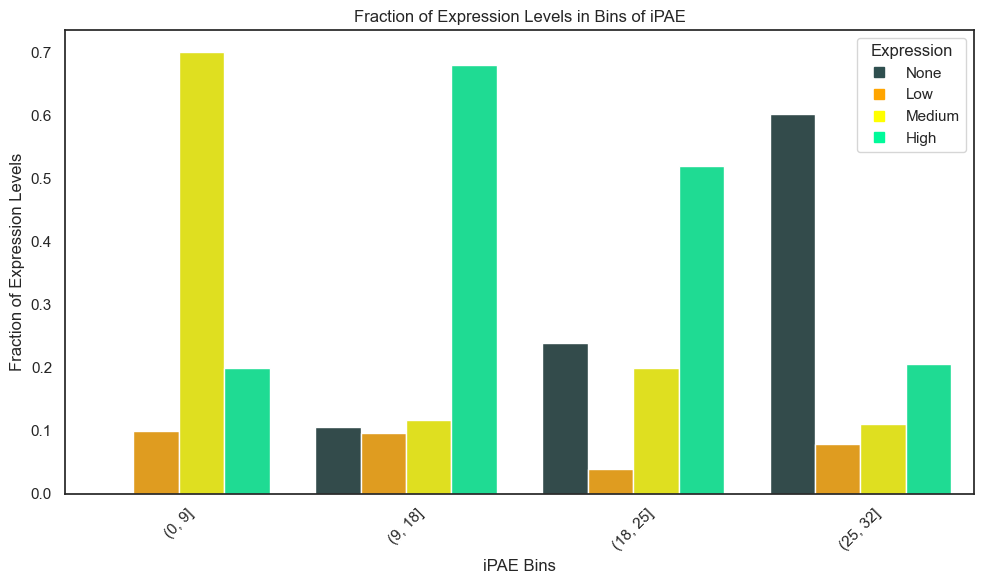

In [ ]:
round1_table['pae_bins'] = pd.cut(round1_table['pae_interaction'], bins=(0,9,18,25,32))

percentage_df = round1_table.groupby(['pae_bins', 'EXPRESSION #']).size().reset_index(name='count')
total_per_bin = round1_table.groupby('pae_bins').size().reset_index(name='total')
percentage_df = pd.merge(percentage_df, total_per_bin, on='pae_bins')
percentage_df['percentage'] = (percentage_df['count'] / percentage_df['total'])

plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, x='pae_bins', y='percentage', hue='EXPRESSION #', palette=custom_palette)

plt.xticks(rotation=45)
plt.xlabel('iPAE Bins')
plt.ylabel('Fraction of Expression Levels')
plt.title('Fraction of Expression Levels in Bins of iPAE')
none = mlines.Line2D([], [], color='darkslategrey', marker='s', linestyle='None', markersize=7, label='None')
low = mlines.Line2D([], [], color='orange', marker='s', linestyle='None', markersize=7, label='Low')
medium = mlines.Line2D([], [], color='yellow', marker='s', linestyle='None', markersize=7, label='Medium')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='s', linestyle='None', markersize=7, label='High')
plt.legend(handles=[none, low, medium, high], title='Expression', facecolor='white')

plt.tight_layout()
# plt.savefig('iPAE-expressionPERCENT_BARPLOT.png', dpi=600)

# ESM Log Likelihood Function

In [3]:
import math
import torch
from transformers import  EsmForMaskedLM, EsmTokenizer


# Load the model and set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model_path = "facebook/esm2_t33_650M_UR50D"
model = EsmForMaskedLM.from_pretrained(base_model_path).to(device)
tokenizer = EsmTokenizer.from_pretrained(base_model_path)
model.eval()

def calc_LL_ESM2(sequence):
    # Tokenize the input sequence
    inputs = tokenizer(sequence, return_tensors="pt")
    input_ids = inputs["input_ids"].to(device)

    log_probs = []

    # Loop through each position in the sequence
    for i in range(len(sequence)):
        # Clone the input tokens and mask one token at a time
        input_ids_masked = input_ids.clone()
        input_ids_masked[0, i + 1] = tokenizer.mask_token_id  # Mask token at position i+1

        # Forward pass with the masked input
        with torch.no_grad():
            outputs = model(input_ids_masked)
            logits = outputs.logits

        # Compute log softmax to get log probabilities
        token_probs = torch.log_softmax(logits, dim=-1)

        # Get the log probability for the actual token at the current position
        actual_token_id = input_ids[0, i + 1]
        log_probs.append(token_probs[0, i + 1, actual_token_id].item())

    # Sum the log probabilities to compute log likelihood
    return math.fsum(log_probs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.61G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


# Apply Sequence Length and Log-Likelihood Functions

In [4]:
round1_table['Seq_Length'] = round1_table['SEQUENCE'].apply(len)
round1_table['Log-Likelihood'] = round1_table['SEQUENCE'].apply(calc_LL_ESM2)
round1_table['LL-Normalized'] = round1_table['Log-Likelihood']/round1_table['Seq_Length']
round1_table

,#,USER,DESIGN NAME,EXPRESSION,EXPRESSION #,SEQUENCE,BINDING?,REPLICATES,Kd - Mean,Kon - Mean,Koff - Mean,plddt,pae_interaction,model_names,methods,Seq_Length,Log-Likelihood,LL-Normalized
0,0,NaN,Cetuximab_scFv,Low,1,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...,TRUE,2,6.64E-09,9.48E+05,4.42E-03,NaN,NaN,NaN,NaN,241,-307.565882,-1.276207
1,1,ahmedsameh,ahmedsameh-Q3,Medium,2,WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,TRUE,2,3.69E-08,1.08E+05,3.76E-03,77.840455,28.217942,"[""Rosetta""]","[""Physics Based""]",132,-192.804469,-1.460640
2,2,ahmedsameh,ahmedsameh-yy2,Medium,2,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQRE...,TRUE,2,6.28E-08,1.09E+05,6.83E-03,77.288939,28.177070,"[""Rosetta""]","[""Physics Based""]",132,-188.894850,-1.431022
3,3,martin.pacesa+lennart.nickel,martin.pacesa-EGFR_l138_s90285_mpnn2,High,3,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...,TRUE,3,4.91E-07,1.86E+04,9.08E-03,88.653551,16.878782,"[""AF2 Backprop""]","[""Hallucination""]",138,-320.676922,-2.323746
4,4,x.rustamov,x.rustamov-m_18_41,High,3,SAGQAQIEEVKARADKAKTLEELKELRKEAYEKNWKAYMAVVDETE...,TRUE,2,4.77E-06,--,--,89.580600,14.921833,"[""AF2 Backprop""]","[""Hallucination""]",100,-212.759757,-2.127598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197,ahmedsameh,ahmedsameh-y6,NaN,0,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,Unknown,3,--,--,--,74.065691,28.327152,"[""Custom (Generative)""]","[""De Novo""]",132,-185.916272,-1.408457
198,198,ahmedsameh,ahmedsameh-s3,Low,1,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,FALSE,2,--,--,--,77.784242,28.178994,"[""Rosetta""]","[""Physics Based""]",132,-189.032498,-1.432064
199,199,akshaychenna,akshayc-10_run_3_1002_dldesign_0_cycle1_af2pred,NaN,0,GTSESLAKLQFIKDLAAALAPLDKKREEAEKKLYEEIKKLVPEGAE...,Unknown,3,--,--,--,77.753258,28.208359,"[""Rosetta""]","[""Physics Based""]",130,-259.424756,-1.995575
200,200,NaN,akshayc-9_run_3_1002_dldesign_0_cycle1_af2pred,Low,1,GISESLAMLEFLKKLAEALAPLTKIEEEAEKELKEKIKELVPEGSE...,FALSE,3,NaN,NaN,NaN,77.456894,28.246956,"[""Rosetta""]","[""Physics Based""]",130,-293.950042,-2.261154


# Log-Likelihood vs iPAE

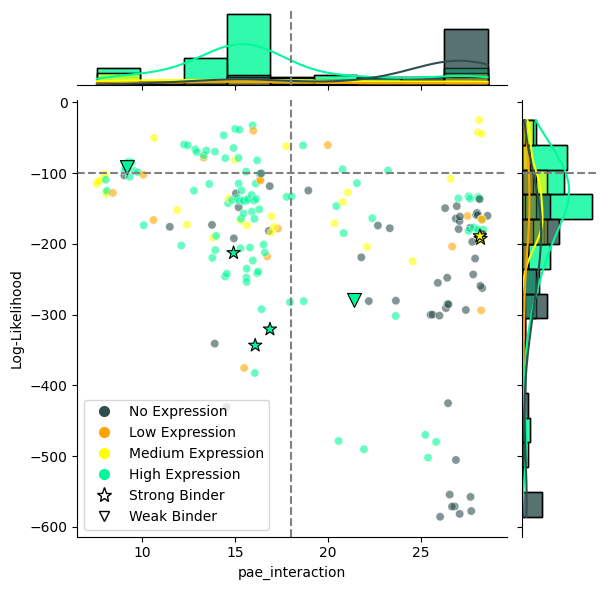

In [8]:
custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=round1_table, x="pae_interaction", y="Log-Likelihood", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=-100)
true_mask = round1_table[(round1_table['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='Log-Likelihood', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = round1_table[(round1_table['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='Log-Likelihood', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower left')
# g.savefig("iPAE-LOGLIK-expression.png", dpi=600)

# Same Plot Masked for >= 100 in Sequence Length

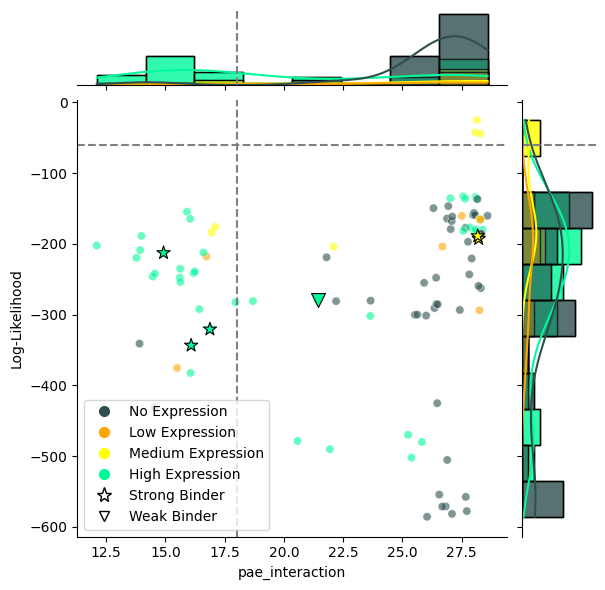

In [6]:
seq_length_mask = round1_table[round1_table['Seq_Length'] >= 100]

custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=seq_length_mask, x="pae_interaction", y="Log-Likelihood", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=-60)
true_mask = seq_length_mask[(seq_length_mask['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='Log-Likelihood', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = seq_length_mask[(seq_length_mask['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='Log-Likelihood', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower left')

# Same Plot Masked for <= 100 in Sequence Length

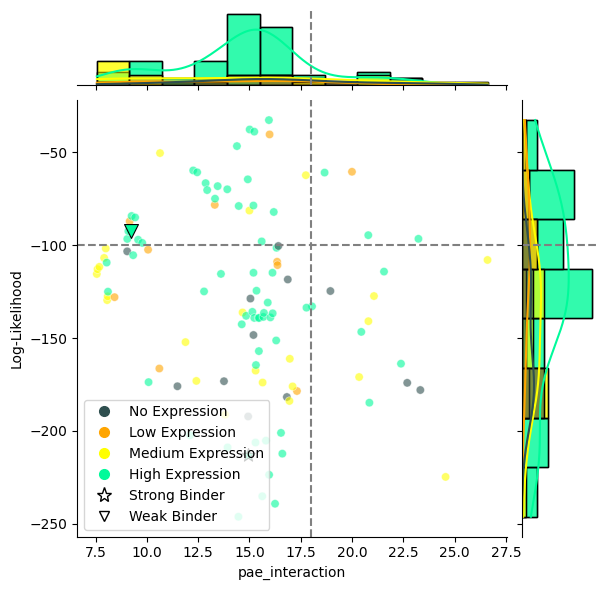

In [9]:
seq_length_mask = round1_table[round1_table['Seq_Length'] <= 100]

custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=seq_length_mask, x="pae_interaction", y="Log-Likelihood", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=-100)
true_mask = seq_length_mask[(seq_length_mask['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='Log-Likelihood', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = seq_length_mask[(seq_length_mask['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='Log-Likelihood', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower left')

# Sequence Length vs iPAE

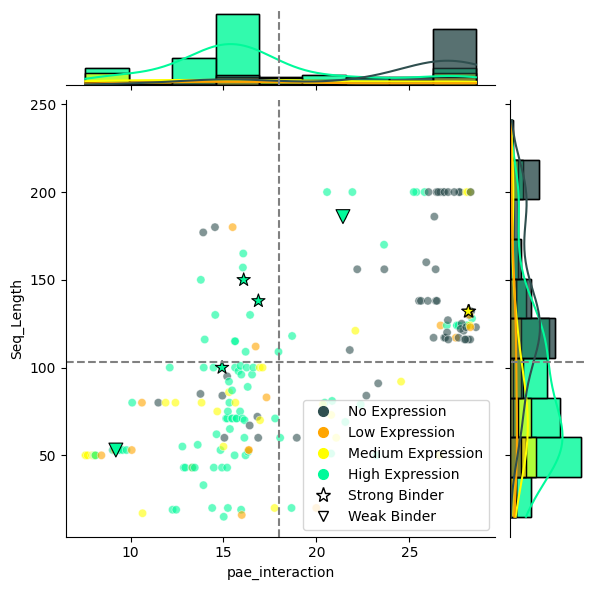

In [ ]:

custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=round1_table, x="pae_interaction", y="Seq_Length", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=103)
true_mask = round1_table[(round1_table['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='Seq_Length', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = round1_table[(round1_table['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='Seq_Length', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower right')
# g.savefig("iPAE-seqLENGTH.png", dpi=600)

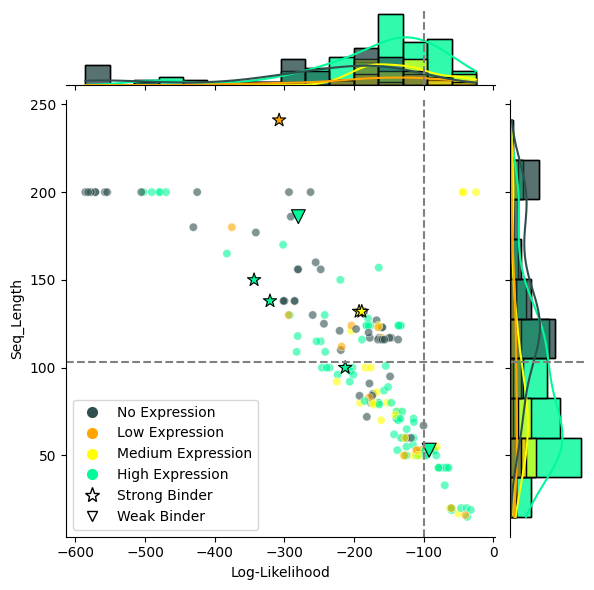

In [13]:
custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=round1_table, x="Log-Likelihood", y="Seq_Length", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=-100, y=103)
true_mask = round1_table[(round1_table['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='Log-Likelihood', y='Seq_Length', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = round1_table[(round1_table['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='Log-Likelihood', y='Seq_Length', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower left')


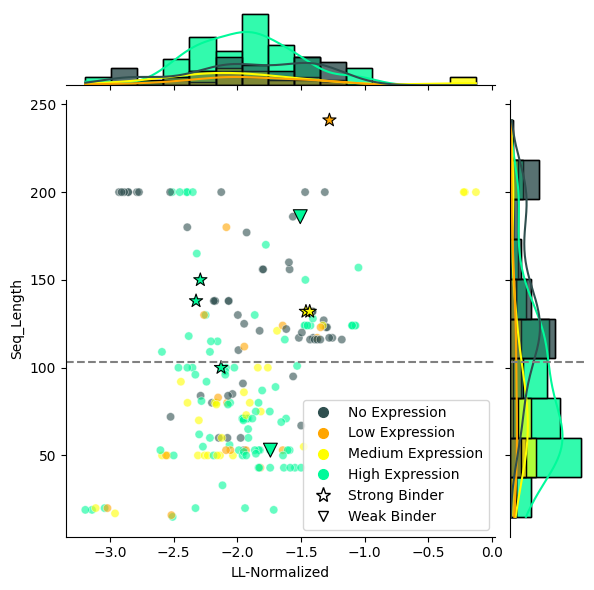

In [17]:
custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=round1_table, x="LL-Normalized", y="Seq_Length", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline( y=103)
true_mask = round1_table[(round1_table['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='LL-Normalized', y='Seq_Length', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = round1_table[(round1_table['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='LL-Normalized', y='Seq_Length', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower right')
